In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm

In [3]:
# VOTERS
roll14 = pd.read_csv('../data/Lembah Pantai GE14 Roll.csv')
roll13 = pd.read_csv('../data/Lembah Pantai GE13 Roll.csv')

# SCORE
score_ppr = pd.read_excel('../data/results v2.xlsx', sheetname='PPR')
score_slp = pd.read_excel('../data/results v2.xlsx', sheetname='SOUTHLEMBAHPANTAI')
score_bangsar = pd.read_excel('../data/results v2.xlsx', sheetname='BANGSAR')

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,6,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [4]:
df_age = pd.read_excel('../data/results v2.xlsx', sheetname='AGEGROUP')

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [5]:
score_ppr13 = score_ppr[score_ppr['GE'] == 'GE13']
score_ppr14 = score_ppr[score_ppr['GE'] == 'GE14']

score_bangsar13 = score_bangsar[score_bangsar['GE'] == 'GE13']
score_bangsar14 = score_bangsar[score_bangsar['GE'] == 'GE14']

score_slp13 = score_slp[score_slp['GE'] == 'GE13']
score_slp14 = score_slp[score_slp['GE'] == 'GE14']

In [6]:
score_bangsar13[['NAMA DM','Pakatan Rakyat']].groupby('NAMA DM').sum()

,Pakatan Rakyat
NAMA DM,
BANGSAR BARU,3170
JALAN MAAROF,1933
TAMAN LUCKY,2566


In [7]:
score_bangsar14[['NAMA DM','Pakatan Rakyat']].groupby('NAMA DM').sum()

,Pakatan Rakyat
NAMA DM,
BANGSAR BARU,3835
JALAN MAAROF,2314
TAMAN LUCKY,2060


In [8]:
print(score_ppr13['Barisan Nasional '].sum(), score_ppr14['Barisan Nasional '].sum())
print(score_ppr13['Pakatan Rakyat'].sum(), score_ppr14['Pakatan Rakyat'].sum())

15185 12212
9800 11336


In [9]:
# Votes issued in PPR areas
GE13_VotesIssued_ppr = score_ppr13[['NAMA DM','Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)',
             'Barisan Nasional ','Pakatan Rakyat','Bebas']]\
            .groupby('NAMA DM').sum().sum(axis=1).to_dict()
    
GE14_VotesIssued_ppr = score_ppr14[['NAMA DM','Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)',
             'Barisan Nasional ','Pakatan Rakyat','PAS']]\
            .groupby('NAMA DM').sum().sum(axis=1).to_dict()
    
# Votes issued in Bangsar areas
GE13_VotesIssued_bangsar = score_bangsar13[['NAMA DM','Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)',
             'Barisan Nasional ','Pakatan Rakyat','Bebas']]\
            .groupby('NAMA DM').sum().sum(axis=1).to_dict()
    
GE14_VotesIssued_bangsar = score_bangsar14[['NAMA DM','Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)',
             'Barisan Nasional ','Pakatan Rakyat','PAS']]\
            .groupby('NAMA DM').sum().sum(axis=1).to_dict()
    
# Votes issued in South Lembah Pantai areas
GE13_VotesIssued_slp = score_slp13[['NAMA DM','Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)',
             'Barisan Nasional ','Pakatan Rakyat','Bebas']]\
            .groupby('NAMA DM').sum().sum(axis=1).to_dict()
    
GE14_VotesIssued_slp = score_slp14[['NAMA DM','Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)',
             'Barisan Nasional ','Pakatan Rakyat','PAS']]\
            .groupby('NAMA DM').sum().sum(axis=1).to_dict()

In [10]:
# BN votes in PPR areas
GE13_BNVotes_ppr = score_ppr13[['NAMA DM','Barisan Nasional ']].groupby('NAMA DM').sum().to_dict()
GE14_BNVotes_ppr = score_ppr14[['NAMA DM','Barisan Nasional ']].groupby('NAMA DM').sum().to_dict()

# BN votes in Bangsar areas
GE13_BNVotes_bangsar = score_bangsar13[['NAMA DM','Barisan Nasional ']].groupby('NAMA DM').sum().to_dict()
GE14_BNVotes_bangsar = score_bangsar14[['NAMA DM','Barisan Nasional ']].groupby('NAMA DM').sum().to_dict()

# BN votes in South Lembah Pantai areas
GE13_BNVotes_slp = score_slp13[['NAMA DM','Barisan Nasional ']].groupby('NAMA DM').sum().to_dict()
GE14_BNVotes_slp = score_slp14[['NAMA DM','Barisan Nasional ']].groupby('NAMA DM').sum().to_dict()

In [11]:
# Pakatan Rakyat votes in PPR areas
GE13_PRVotes_ppr = score_ppr13[['NAMA DM','Pakatan Rakyat']].groupby('NAMA DM').sum().to_dict()
GE14_PRVotes_ppr = score_ppr14[['NAMA DM','Pakatan Rakyat']].groupby('NAMA DM').sum().to_dict()

# Pakatan Rakyat votes in Bangsar areas
GE13_PRVotes_bangsar = score_bangsar13[['NAMA DM','Pakatan Rakyat']].groupby('NAMA DM').sum().to_dict()
GE14_PRVotes_bangsar = score_bangsar14[['NAMA DM','Pakatan Rakyat']].groupby('NAMA DM').sum().to_dict()

# Pakatan Rakyat votes in South Lembah Pantai areas
GE13_PRVotes_slp = score_slp13[['NAMA DM','Pakatan Rakyat']].groupby('NAMA DM').sum().to_dict()
GE14_PRVotes_slp = score_slp14[['NAMA DM','Pakatan Rakyat']].groupby('NAMA DM').sum().to_dict()

---

### Data Preprocessing & Transformation

In [12]:
GE13_PRVotes_slp.update(GE13_BNVotes_slp)
GE14_PRVotes_slp.update(GE14_BNVotes_slp)

GE13_PRVotes_ppr.update(GE13_BNVotes_ppr)
GE14_PRVotes_ppr.update(GE14_BNVotes_ppr)

GE13_PRVotes_bangsar.update(GE13_BNVotes_bangsar)
GE14_PRVotes_bangsar.update(GE14_BNVotes_bangsar)

In [13]:
ge13_votersNum = roll13['NamaDM'].value_counts().to_dict()
ge14_votersNum = roll14['NamaDM'].value_counts().to_dict()

Use votes issue as denominator of ratio, because in GE13 pantai hill park there are more votes than voters (data from roll) 

In [14]:
votesPerVotesIssued = {}

In [15]:
votesPerVotesIssued.update({'GE13':{}})

SOUTHLEMBAHPANTAI = {'BN':{}, 'PR':{}}
for i,r in pd.DataFrame(GE13_PRVotes_slp).iterrows():
    v = GE13_VotesIssued_slp[i]
    r_bn = r['Barisan Nasional ']/v
    SOUTHLEMBAHPANTAI['BN'].update( {i:r_bn})
    r_pr = r['Pakatan Rakyat']/v
    SOUTHLEMBAHPANTAI['PR'].update( {i:r_pr})
votesPerVotesIssued['GE13'].update({'SOUTH LEMBAH PANTAI':SOUTHLEMBAHPANTAI})

PPR = {'BN':{}, 'PR':{}}
for i,r in pd.DataFrame(GE13_PRVotes_ppr).iterrows():
    v = GE13_VotesIssued_ppr[i]
    r_bn = r['Barisan Nasional ']/v
    PPR['BN'].update({i:r_bn})
    r_pr = r['Pakatan Rakyat']/v
    PPR['PR'].update({i:r_pr})
votesPerVotesIssued['GE13'].update({'PPR':PPR})
    
BANGSAR = {'BN':{}, 'PR':{}}    
for i,r in pd.DataFrame(GE13_PRVotes_bangsar).iterrows():
    v = GE13_VotesIssued_bangsar[i]
    r_bn = r['Barisan Nasional ']/v
    BANGSAR['BN'].update({i:r_bn})
    r_pr = r['Pakatan Rakyat']/v
    BANGSAR['PR'].update({i:r_pr})
votesPerVotesIssued['GE13'].update({'BANGSAR':BANGSAR})

In [16]:
votesPerVotesIssued.update({'GE14':{}})

SOUTHLEMBAHPANTAI = {'BN':{}, 'PR':{}}
for i,r in pd.DataFrame(GE14_PRVotes_slp).iterrows():
    v = GE14_VotesIssued_slp[i]
    r_bn = r['Barisan Nasional ']/v
    SOUTHLEMBAHPANTAI['BN'].update( {i:r_bn})
    r_pr = r['Pakatan Rakyat']/v
    SOUTHLEMBAHPANTAI['PR'].update( {i:r_pr})
votesPerVotesIssued['GE14'].update({'SOUTH LEMBAH PANTAI':SOUTHLEMBAHPANTAI})

PPR = {'BN':{}, 'PR':{}}
for i,r in pd.DataFrame(GE14_PRVotes_ppr).iterrows():
    v = GE14_VotesIssued_ppr[i]
    r_bn = r['Barisan Nasional ']/v
    PPR['BN'].update({i:r_bn})
    r_pr = r['Pakatan Rakyat']/v
    PPR['PR'].update({i:r_pr})
votesPerVotesIssued['GE14'].update({'PPR':PPR})
    
BANGSAR = {'BN':{}, 'PR':{}}    
for i,r in pd.DataFrame(GE14_PRVotes_bangsar).iterrows():
    v = GE14_VotesIssued_bangsar[i]
    r_bn = r['Barisan Nasional ']/v
    BANGSAR['BN'].update({i:r_bn})
    r_pr = r['Pakatan Rakyat']/v
    BANGSAR['PR'].update({i:r_pr})
votesPerVotesIssued['GE14'].update({'BANGSAR':BANGSAR})

In [17]:
dat = df_age[['GE','AREA_OF_INTEREST','NAMADM','21_30','31_40','41_50','51_60','61_70','71_80','Above 80']].drop_duplicates()

In [18]:
bn_tmp = []
pr_tmp = []

for i,r in dat.iterrows():
    ge = r['GE']
    area = r['AREA_OF_INTEREST']
    dm = r['NAMADM']
    bn_tmp.append(votesPerVotesIssued[ge][area]['BN'][dm])
    pr_tmp.append(votesPerVotesIssued[ge][area]['PR'][dm])
    
dat['BN'] = bn_tmp
dat['PR'] = pr_tmp

___

In [22]:
X = dat[['21_30', '31_40', '41_50', '51_60','61_70', '71_80', 'Above 80']]
y = dat["PR"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PR   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     144.6
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           4.05e-15
Time:                        20:47:11   Log-Likelihood:                 29.484
No. Observations:                  26   AIC:                            -44.97
Df Residuals:                      19   BIC:                            -36.16
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
21_30         -0.6099      0.516     -1.182      0.252      -1.690       0.470
31_40          1.1273      0.530      2.127      0.047       0.018       2.237
41_50          0.6392      0.948      0.674      0.508      -1.346       2.624
51_60          0.3341      1.156      0.289      0.776      -2.086       2.754
61_70         -1.1147      1.229     -0.907      0.376      -3.688       1.458
71_80          5.4184      2.308      2.348      0.030       0.588      10.249
Above 80       1.6911      4.155      0.407      0.689      -7.006      10.388
==============================================================================
Omnibus:                        1.533   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                1.240
Skew:                           0.513   Prob(JB):                        0.538
Kurtosis:                       2.697   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X = dat[['71_80', 'Above 80']]
y = dat["BN"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BN   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     13.25
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           0.000133
Time:                        21:59:48   Log-Likelihood:                -6.4995
No. Observations:                  26   AIC:                             17.00
Df Residuals:                      24   BIC:                             19.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
71_80         16.7042      3.991      4.185      0.000       8.467      24.941
Above 80     -35.4984     10.619     -3.343      0.003     -57.415     -13.582
==============================================================================
Omnibus:                        1.732   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.421   Jarque-Bera (JB):                1.471
Skew:                          -0.549   Prob(JB):                        0.479
Kurtosis:                       2.612   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Logistic Regression

In [58]:
Y_winner13 = pd.DataFrame({'BN':yBN13.values,
'PR':yPR13.values}).idxmax(axis=1)

Y_winner14 = pd.DataFrame({'BN':yBN14.values,
'PR':yPR14.values}).idxmax(axis=1)

In [59]:
Y_winner_encoded13 = []
for w in Y_winner13:
    if w=='PR':
        Y_winner_encoded13.append(0)
    else:
        Y_winner_encoded13.append(1)
        
model13 = sm.Logit(Y_winner_encoded13, X13.values)
result13 = model13.fit(method='bfgs')

result13.summary()

         Current function value: 0.605582
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   19
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            6
Date:                Tue, 11 Dec 2018   Pseudo R-squ.:                  0.1103
Time:                        22:00:55   Log-Likelihood:                -11.506
converged:                      False   LL-Null:                       -12.932
                                        LLR p-value:                    0.8272
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.3064     10.861      0.581      0.561     -14.982      27.594
x2           -11.4699     14.365     -0.798      0.425     -39.624      16.684
x3            16.5339     21.667      0.763      0.445     -25.934      59.001
x4            -5.9147     33.166     -0.178      0.858     -70.919      59.090
x5            -5.6149     59.965     -0.094      0.925    -123.145     111.915
x6            -6.3935     90.054     -0.071      0.943    -182.895     170.109
x7            -8.1673    111.728     -0.073      0.942    -227.151     210.816
==============================================================================
"""

In [53]:
Y_winner_encoded14 = []
for w in Y_winner14:
    if w=='PR':
        Y_winner_encoded14.append(0)
    else:
        Y_winner_encoded14.append(1)
        
model14 = sm.Logit(Y_winner_encoded14, X14.values)
result14 = model14.fit(method='bfgs')

result14.summary()

         Current function value: 0.559881
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   18
Model:                          Logit   Df Residuals:                       11
Method:                           MLE   Df Model:                            6
Date:                Tue, 11 Dec 2018   Pseudo R-squ.:                  0.1204
Time:                        22:00:38   Log-Likelihood:                -10.078
converged:                      False   LL-Null:                       -11.457
                                        LLR p-value:                    0.8385
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -14.0054     16.961     -0.826      0.409     -47.248      19.238
x2             3.1463     13.701      0.230      0.818     -23.708      30.001
x3             9.2328     14.307      0.645      0.519     -18.809      37.274
x4            -5.6643     19.621     -0.289      0.773     -44.120      32.791
x5            -4.8386     29.134     -0.166      0.868     -61.940      52.262
x6             4.9871     61.335      0.081      0.935    -115.228     125.202
x7             8.4551    112.765      0.075      0.940    -212.560     229.471
==============================================================================
"""

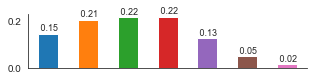

In [54]:
sns.set_style('white')
f,ax = plt.subplots(figsize=(5,1))
p1 = X13.mean().plot.bar()
for patch in p1.patches:
    try:
        if patch.get_height()>0:
            p1.annotate(' %.2f' % patch.get_height(), xy=( patch.get_x() + patch.get_width()/2, patch.get_height()+.01 ), ha='center',fontsize=9)
    except:
        pass

p1.set_xticklabels('')
sns.despine()

___

In [37]:
df13 = pd.read_excel('../data/results v3.xlsx',sheetname='GE13').groupby('NAMADM').sum()
df14 = pd.read_excel('../data/results v3.xlsx',sheetname='GE14').groupby('NAMA DM').sum()

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [38]:
df13['RegisteredVoters'] = roll13['NamaDM'].value_counts()
df14['RegisteredVoters'] = roll14['NamaDM'].value_counts()

In [39]:
df14['BN_ratio'] = df14['BN'].divide(df14['RegisteredVoters'])
df14['PR_ratio'] = df14['PKR'].divide(df14['RegisteredVoters'])
df14['PAS_ratio'] = df14['PAS'].divide(df14['RegisteredVoters'])

df13['BN_ratio'] = df13['BN'].divide(df13['RegisteredVoters'])
df13['PR_ratio'] = df13['PR'].divide(df13['RegisteredVoters'])
df13['IND_ratio'] = df13['IND'].divide(df13['RegisteredVoters'])

In [40]:
def calculate_age(born):
    electionday = pd.to_datetime('2018-05-09')
    return electionday.year - born.year - ((electionday.month, electionday.day) < (born.month, born.day))

roll14['Age'] = pd.to_datetime(roll14['TahunLahir']).apply(lambda x: calculate_age(x))
max_age = max(roll14['Age'].max(),roll13['Umur'].max())

roll14['AgeGroup'] = pd.cut(roll14['Age'], [20,30,40,50,60,70,80,max_age] )
roll13['AgeGroup'] = pd.cut(roll13['Umur'], bins=[20,30,40,50,60,70,80,max_age])

In [41]:
ageGroupDist14 = {}
for dm in roll14['NamaDM'].unique():
    ageGroupDist14.update({dm: dict(roll14[roll14['NamaDM']==dm]['AgeGroup'].value_counts()) })
    
ageGroupDist13 = {}
for dm in roll13['NamaDM'].unique():
    ageGroupDist13.update({dm: dict(roll13[roll13['NamaDM']==dm]['AgeGroup'].value_counts()) })

In [42]:
df_ageGroup14 = pd.DataFrame(ageGroupDist14).T
df_ageGroup14.columns = [str(col).replace(', ', '_') for col in df_ageGroup14.columns]
df_ageGroup13 = pd.DataFrame(ageGroupDist13).T
df_ageGroup13.columns = [str(col).replace(', ', '_') for col in df_ageGroup13.columns]

In [43]:
df_ageGroup14['RegisteredVoters'] = roll14['NamaDM'].value_counts()
df_ageGroup13['RegisteredVoters'] = roll13['NamaDM'].value_counts()

In [44]:
X14 = df_ageGroup14[['(20_30]','(30_40]','(40_50]','(50_60]','(60_70]','(70_80]','(80_109]' ]].divide(df_ageGroup14['RegisteredVoters'], axis=0)
X13 = df_ageGroup13[['(20_30]','(30_40]','(40_50]','(50_60]','(60_70]','(70_80]','(80_109]' ]].divide(df_ageGroup13['RegisteredVoters'], axis=0)

In [45]:
yBN13 = df13['BN_ratio']
yBN14 = df14['BN_ratio']

yPR13 = df13['PR_ratio']
yPR14 = df14['PR_ratio']

yIND13 = df13['IND_ratio']
yPAS14 = df14['PAS_ratio']

In [46]:
X = X14.append(X13)

In [55]:
yBN = yBN14.append(yBN13).drop('TASIK PERDANA').drop('KAMPUNG PASIR').drop('KAMPONG PASIR').drop('PANTAI BAHARU')
yPR = yPR14.append(yPR13).drop('TASIK PERDANA').drop('KAMPUNG PASIR').drop('KAMPONG PASIR').drop('PANTAI BAHARU')

yIND_PAS = yPAS14.append(yIND13).drop('TASIK PERDANA').drop('KAMPUNG PASIR').drop('KAMPONG PASIR').drop('PANTAI BAHARU')

____

In [380]:
# Note the difference in argument order
model = sm.OLS(yBN, X).fit()
predictions = model.predict(X) # make the predictions by the model
# X = sm.add_constant(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BN_ratio   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     4.432
Date:                Mon, 09 Jul 2018   Prob (F-statistic):            0.00325
Time:                        01:55:27   Log-Likelihood:                 25.914
No. Observations:                  33   AIC:                            -37.83
Df Residuals:                      26   BIC:                            -27.35
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
(20_30]        1.1711      0.496      2.359      0.026       0.151       2.192
(30_40]       -0.1083      0.568     -0.191      0.850      -1.276       1.059
(40_50]        0.0093      0.713      0.013      0.990      -1.457       1.475
(50_60]        0.9644      0.978      0.986      0.333      -1.047       2.976
(60_70]        0.5527      1.484      0.373      0.713      -2.497       3.602
(70_80]        0.2245      2.650      0.085      0.933      -5.222       5.671
(80_109]      -6.6392      4.369     -1.520      0.141     -15.620       2.342
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   2.316
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.062
Skew:                          -0.061   Prob(JB):                        0.970
Kurtosis:                       3.173   Cond. No.                         97.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [893]:
# Note the difference in argument order
model = sm.OLS(yBN, X['(30_40]']).fit()
predictions = model.predict(X['(30_40]']) # make the predictions by the model
# X = sm.add_constant(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BN_ratio   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     168.5
Date:                Mon, 09 Jul 2018   Prob (F-statistic):           2.70e-14
Time:                        14:43:26   Log-Likelihood:                 18.077
No. Observations:                  33   AIC:                            -34.15
Df Residuals:                      32   BIC:                            -32.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
(30_40]        1.4575      0.112     12.979      0.000       1.229       1.686
==============================================================================
Omnibus:                        0.390   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.061
Skew:                          -0.103   Prob(JB):                        0.970
Kurtosis:                       3.046   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [391]:
X.join(yBN).corr()

,(20_30],(30_40],(40_50],(50_60],(60_70],(70_80],(80_109],BN_ratio
(20_30],1.000000,0.718298,-0.339364,-0.782391,-0.798735,-0.655746,-0.516138,0.418262
(30_40],0.718298,1.000000,-0.061038,-0.718014,-0.854390,-0.779823,-0.733041,0.464697
(40_50],-0.339364,-0.061038,1.000000,0.313259,-0.192584,-0.281080,-0.415803,0.148326
(50_60],-0.782391,-0.718014,0.313259,1.000000,0.622729,0.334455,0.272691,-0.228857
(60_70],-0.798735,-0.854390,-0.192584,0.622729,1.000000,0.877697,0.802874,-0.502313
(70_80],-0.655746,-0.779823,-0.281080,0.334455,0.877697,1.000000,0.932204,-0.595939
(80_109],-0.516138,-0.733041,-0.415803,0.272691,0.802874,0.932204,1.000000,-0.614816
BN_ratio,0.418262,0.464697,0.148326,-0.228857,-0.502313,-0.595939,-0.614816,1.000000


In [395]:
# X.join(yPR)
# .corr()

X13.join(yPR13).corr()

,(20_30],(30_40],(40_50],(50_60],(60_70],(70_80],(80_109],PR_ratio
(20_30],1.000000,0.607648,-0.295463,-0.813603,-0.782610,-0.630623,-0.477264,-0.523130
(30_40],0.607648,1.000000,0.112234,-0.743390,-0.843441,-0.771297,-0.795423,-0.484861
(40_50],-0.295463,0.112234,1.000000,0.163272,-0.268836,-0.331721,-0.451090,-0.147526
(50_60],-0.813603,-0.743390,0.163272,1.000000,0.707910,0.431541,0.439652,0.283151
(60_70],-0.782610,-0.843441,-0.268836,0.707910,1.000000,0.906869,0.812369,0.643157
(70_80],-0.630623,-0.771297,-0.331721,0.431541,0.906869,1.000000,0.885283,0.742952
(80_109],-0.477264,-0.795423,-0.451090,0.439652,0.812369,0.885283,1.000000,0.531105
PR_ratio,-0.523130,-0.484861,-0.147526,0.283151,0.643157,0.742952,0.531105,1.000000


In [401]:
X13.join(yBN13).corr()

,(20_30],(30_40],(40_50],(50_60],(60_70],(70_80],(80_109],BN_ratio
(20_30],1.000000,0.607648,-0.295463,-0.813603,-0.782610,-0.630623,-0.477264,0.468357
(30_40],0.607648,1.000000,0.112234,-0.743390,-0.843441,-0.771297,-0.795423,0.579432
(40_50],-0.295463,0.112234,1.000000,0.163272,-0.268836,-0.331721,-0.451090,-0.025360
(50_60],-0.813603,-0.743390,0.163272,1.000000,0.707910,0.431541,0.439652,-0.312102
(60_70],-0.782610,-0.843441,-0.268836,0.707910,1.000000,0.906869,0.812369,-0.541764
(70_80],-0.630623,-0.771297,-0.331721,0.431541,0.906869,1.000000,0.885283,-0.629559
(80_109],-0.477264,-0.795423,-0.451090,0.439652,0.812369,0.885283,1.000000,-0.647856
BN_ratio,0.468357,0.579432,-0.025360,-0.312102,-0.541764,-0.629559,-0.647856,1.000000


In [396]:
X14.join(yPR14).corr()

,(20_30],(30_40],(40_50],(50_60],(60_70],(70_80],(80_109],PR_ratio
(20_30],1.000000,0.786451,-0.501746,-0.748136,-0.806707,-0.718928,-0.568479,-0.533763
(30_40],0.786451,1.000000,-0.391274,-0.700826,-0.917580,-0.767156,-0.640053,-0.576851
(40_50],-0.501746,-0.391274,1.000000,0.438254,0.155309,-0.016140,-0.200044,0.289953
(50_60],-0.748136,-0.700826,0.438254,1.000000,0.615626,0.321933,0.183772,0.052278
(60_70],-0.806707,-0.917580,0.155309,0.615626,1.000000,0.841686,0.732948,0.545971
(70_80],-0.718928,-0.767156,-0.016140,0.321933,0.841686,1.000000,0.945591,0.732921
(80_109],-0.568479,-0.640053,-0.200044,0.183772,0.732948,0.945591,1.000000,0.665040
PR_ratio,-0.533763,-0.576851,0.289953,0.052278,0.545971,0.732921,0.665040,1.000000


In [400]:
X14.join(yBN14).corr()

,(20_30],(30_40],(40_50],(50_60],(60_70],(70_80],(80_109],BN_ratio
(20_30],1.000000,0.786451,-0.501746,-0.748136,-0.806707,-0.718928,-0.568479,0.299736
(30_40],0.786451,1.000000,-0.391274,-0.700826,-0.917580,-0.767156,-0.640053,-0.061607
(40_50],-0.501746,-0.391274,1.000000,0.438254,0.155309,-0.016140,-0.200044,0.336984
(50_60],-0.748136,-0.700826,0.438254,1.000000,0.615626,0.321933,0.183772,0.005183
(60_70],-0.806707,-0.917580,0.155309,0.615626,1.000000,0.841686,0.732948,-0.095644
(70_80],-0.718928,-0.767156,-0.016140,0.321933,0.841686,1.000000,0.945591,-0.440068
(80_109],-0.568479,-0.640053,-0.200044,0.183772,0.732948,0.945591,1.000000,-0.533711
BN_ratio,0.299736,-0.061607,0.336984,0.005183,-0.095644,-0.440068,-0.533711,1.000000


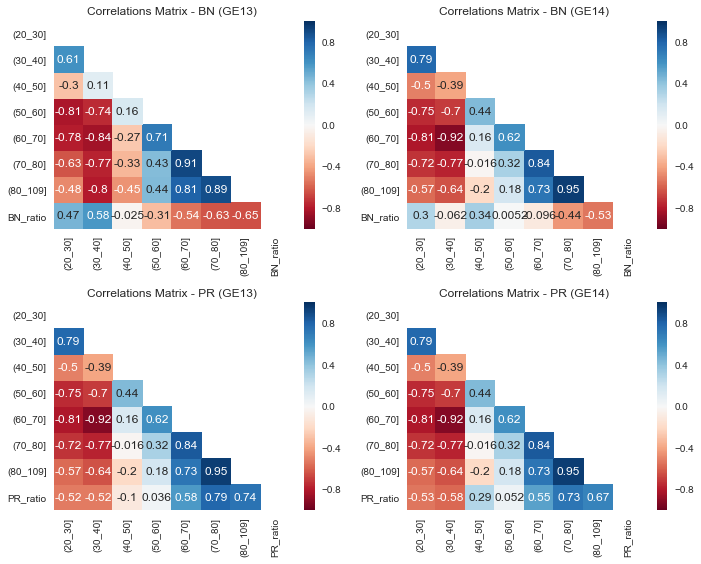

In [988]:
sns.set_style('white')

fig,ax = plt.subplots(2,2, figsize=(10,8))
correlationsPR13 = X14.join(yPR13).corr()
correlationsPR14 = X14.join(yPR14).corr()
correlationsBN13 = X13.join(yBN13).corr()
correlationsBN14 = X14.join(yBN14).corr()

mask = np.zeros_like(correlationsBN13)
mask[np.triu_indices_from(mask)] = True

# cax = ax[0][0].matshow(correlationsBN13, vmin=-1, vmax=1)
sns.heatmap(correlationsBN13, cmap="RdBu", ax=ax[0][0], mask=mask, annot=True)
ax[0][0].set_title('Correlations Matrix - BN (GE13)')

# cax = ax[0][1].matshow(correlationsBN14, vmin=-1, vmax=1)
sns.heatmap(correlationsBN14, cmap="RdBu", ax=ax[0][1], mask=mask, annot=True)
ax[0][1].set_title('Correlations Matrix - BN (GE14)')

# cax = ax[1][0].matshow(correlationsPR13, vmin=-1, vmax=1)
sns.heatmap(correlationsPR13, cmap="RdBu", ax=ax[1][0], mask=mask, annot=True)
ax[1][0].set_title('Correlations Matrix - PR (GE13)')

# cax = ax[1][1].matshow(correlationsBN14, vmin=-1, vmax=1)
sns.heatmap(correlationsPR14, cmap="RdBu", ax=ax[1][1], mask=mask, annot=True)
ax[1][1].set_title('Correlations Matrix - PR (GE14)')

plt.tight_layout()

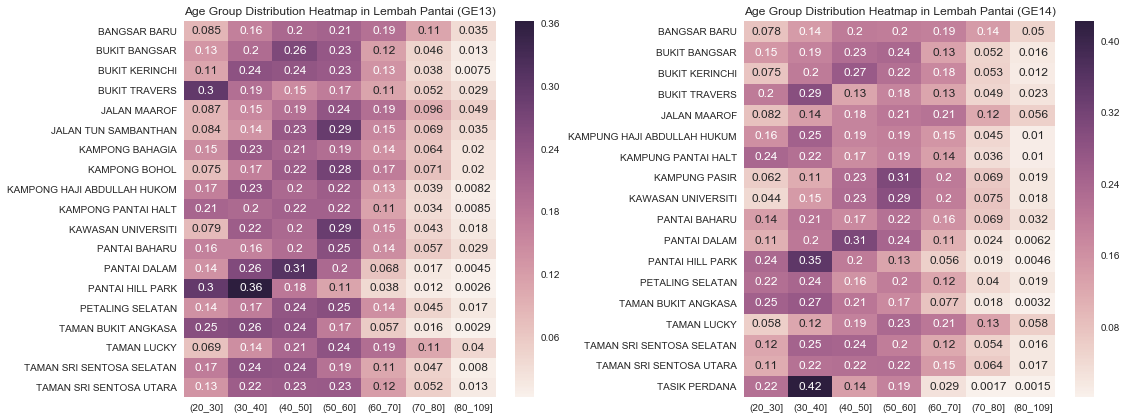

In [992]:
f,ax = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(X13, ax=ax[0], annot=True)
ax[0].set_title("Age Group Distribution Heatmap in Lembah Pantai (GE13)")
sns.heatmap(X14, ax=ax[1], annot=True)
ax[1].set_title("Age Group Distribution Heatmap in Lembah Pantai (GE14)")
plt.tight_layout()

___

#### High Level Relationship between Mode AgeGroup and WinningParty

In [1472]:
a = pd.DataFrame({'BN':yBN, 'PR':yPR}).idxmax(axis=1).values
b = X.idxmax(axis=1).values

In [1477]:
pd.DataFrame({'BN':yBN13, 'PR':yPR13}).idxmax(axis=1).value_acounts()

PR    11
BN     7
dtype: int64

In [1478]:
pd.DataFrame({'BN':yBN14, 'PR':yPR14}).idxmax(axis=1).value_counts()

PR    12
BN     6
dtype: int64

In [1030]:
df = pd.DataFrame({'Winner':pd.DataFrame({'BN':yBN, 'PR':yPR}).idxmax(axis=1).values,
              'ModeAgeGroup':X.idxmax(axis=1).values})

AgeGroup      (20_30]  (30_40]  (40_50]  (50_60]  (60_70]
WinningParty                                             
BN                  1        7        3        1        0
PR                  1        5        3       11        1


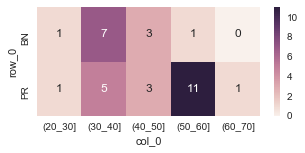

In [1051]:
ct = pd.crosstab(a,b, rownames=['WinningParty'], colnames=['AgeGroup'] )
print(ct)
f,ax = plt.subplots(figsize=(5,2))
sns.heatmap(pd.crosstab(a,b), annot=True, ax=ax)

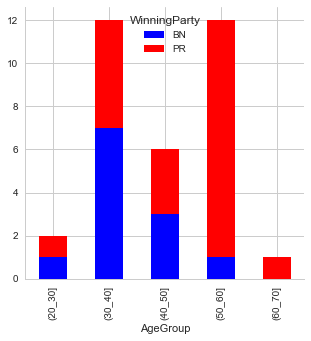

In [1080]:
sns.set_style('whitegrid')
ax = ct.T.plot(kind="bar", 
            figsize=(5,5),
            stacked=True,
         color=['B','R'],)

sns.despine()

___

### BANGSAR

In [61]:
X13_bangsar = X13.loc[['BANGSAR BARU','JALAN MAAROF','TAMAN LUCKY']]
X14_bangsar = X14.loc[['BANGSAR BARU','JALAN MAAROF','TAMAN LUCKY']]

In [62]:
from matplotlib.colors import ListedColormap
cmap = sns.cubehelix_palette(n_colors=10)

Text(0.5,1,'BANGSAR - GE14')

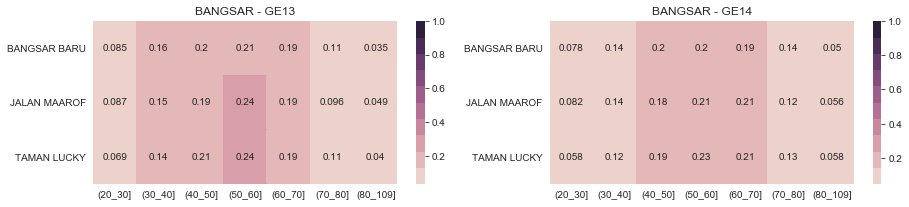

In [64]:
f,ax = plt.subplots(1,2,figsize=(15,3))
sns.heatmap(X13_bangsar,annot=True, 
            cmap=ListedColormap(cmap),
             vmax=1, ax=ax[0])
ax[0].set_title('BANGSAR - GE13')

sns.heatmap(X14_bangsar,annot=True, 
            cmap=ListedColormap(cmap),
             vmax=1, ax=ax[1] )
ax[1].set_title('BANGSAR - GE14')

In [65]:
dm = 'TAMAN LUCKY'
toplot = pd.DataFrame([X13_bangsar.loc[dm],X14_bangsar.loc[dm]])
toplot.index = ['GE13','GE14']

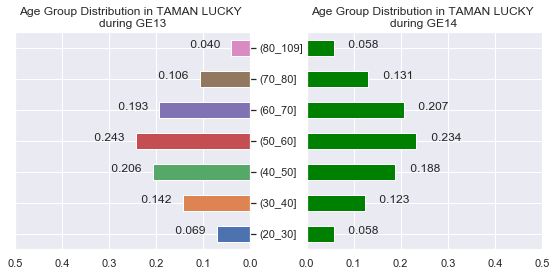

In [66]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(8,4))
toplot.loc['GE13'].plot.barh(ax=axes[0], align='center')
toplot.loc['GE14'].plot.barh(ax=axes[1], align='center', color='Green')
axes[0].set_xlim(0,.5)
axes[1].set_xlim(0,.5)
axes[0].invert_xaxis()

# axes[0].set(yticks=y, yticklabels=states)
axes[0].set(yticklabels=toplot.columns)
axes[0].yaxis.tick_right()

axes[0].set_title('Age Group Distribution in %s \nduring GE13' %dm)
axes[1].set_title('Age Group Distribution in %s \nduring GE14' %dm )

for ax in axes:
    for patch in ax.patches:
        try:
            if patch.get_height()>0:
                ax.annotate(' %.3f' % patch.get_width(), xy=( patch.get_width()+0.06, patch.get_y() + patch.get_height()/2 ), ha='center',fontsize=12)
        except:
            pass


fig.tight_layout()
fig.subplots_adjust(wspace=0.24)

[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'BANGSAR BARU'),
 Text(0,0,''),
 Text(0,0,'JALAN MAAROF'),
 Text(0,0,''),
 Text(0,0,'TAMAN LUCKY')]

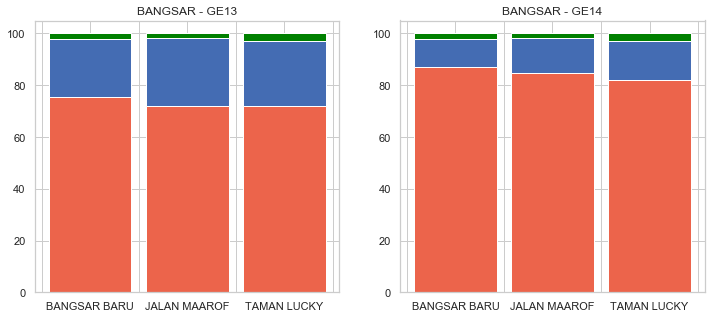

In [67]:
sns.set_style('whitegrid')
f,ax = plt.subplots(1,2, figsize=(12,5))

# Data
tmp13 = pd.DataFrame({'BN':yBN, 'PR':yPR, 'IND':yIND_PAS}).loc[['BANGSAR BARU','JALAN MAAROF','TAMAN LUCKY']].reset_index().groupby('index').nth(1)
tmp14 = pd.DataFrame({'BN':yBN, 'PR':yPR, 'PAS':yIND_PAS}).loc[['BANGSAR BARU','JALAN MAAROF','TAMAN LUCKY']].reset_index().groupby('index').nth(0)
r = [0,1,2]
raw_data_13 = {'orangeBars': tmp13['PR'].values,'blueBars': tmp13['BN'].values, 'greenBars':tmp13['IND'].values}
raw_data_14 = {'orangeBars': tmp14['PR'].values,'blueBars': tmp14['BN'].values, 'greenBars':tmp14['PAS'].values}
df13 = pd.DataFrame(raw_data_13)
df14 = pd.DataFrame(raw_data_14)
 
# From raw value to percentage
totals13 = [j+k+i for j,k,i in zip( df13['orangeBars'], df13['blueBars'], df14['greenBars'] )]
totals14 = [j+k+i for j,k,i in zip( df14['orangeBars'], df14['blueBars'], df14['greenBars'] )]

orangeBars13 = [i / j * 100 for i,j in zip(df13['orangeBars'], totals13)]
orangeBars14 = [i / j * 100 for i,j in zip(df14['orangeBars'], totals14)]
blueBars13 = [i / j * 100 for i,j in zip(df13['blueBars'], totals13)]
blueBars14 = [i / j * 100 for i,j in zip(df14['blueBars'], totals14)]
greenBars13 = [i / j * 100 for i,j in zip(df14['greenBars'], totals13)]
greenBars14 = [i / j * 100 for i,j in zip(df14['greenBars'], totals14)]
 
# plot
barWidth = 0.85
names = ('','','BANGSAR BARU','','JALAN MAAROF','','TAMAN LUCKY')


ax[0].bar(r, greenBars13, bottom=[i+j for i,j in zip(blueBars13,orangeBars13)],  color='green', edgecolor='white', width=barWidth)
ax[0].bar(r, blueBars13, bottom=orangeBars13,  color='#446CB3', edgecolor='white', width=barWidth)
ax[0].bar(r, orangeBars13, color='#EC644B', edgecolor='white', width=barWidth)
ax[0].set_title("BANGSAR - GE13")

ax[1].bar(r, greenBars14, bottom=[i+j for i,j in zip(blueBars14,orangeBars14)],  color='green', edgecolor='white', width=barWidth)
ax[1].bar(r, blueBars14, bottom=orangeBars14,  color='#446CB3', edgecolor='white', width=barWidth)
ax[1].bar(r, orangeBars14, color='#EC644B', edgecolor='white', width=barWidth)
ax[1].set_title("BANGSAR - GE14")
 
ax[0].set_xticklabels(names)
ax[1].set_xticklabels(names)
# Custom x axis
# plt.xticks(r, names)
# plt.xlabel("group")

In [68]:
# sns.set_style('whitegrid')
# f,ax = plt.subplots(1,2, figsize=(12,5))

# # Data
# tmp13 = pd.DataFrame({'BN':yBN, 'PR':yPR}).loc[['BANGSAR BARU','JALAN MAAROF','TAMAN LUCKY']].reset_index().groupby('index').nth(1)
# tmp14 = pd.DataFrame({'BN':yBN, 'PR':yPR}).loc[['BANGSAR BARU','JALAN MAAROF','TAMAN LUCKY']].reset_index().groupby('index').nth(0)
# r = [0,1,2]
# raw_data_13 = {'orangeBars': tmp13['PR'].values,'blueBars': tmp13['BN'].values}
# raw_data_14 = {'orangeBars': tmp14['PR'].values,'blueBars': tmp14['BN'].values}
# df13 = pd.DataFrame(raw_data_13)
# df14 = pd.DataFrame(raw_data_14)
 
# # From raw value to percentage
# totals13 = [j+k for j,k in zip( df13['orangeBars'], df13['blueBars'])]
# totals14 = [j+k for j,k in zip( df14['orangeBars'], df14['blueBars'])]

# orangeBars13 = [i / j * 100 for i,j in zip(df13['orangeBars'], totals13)]
# orangeBars14 = [i / j * 100 for i,j in zip(df14['orangeBars'], totals14)]
# blueBars13 = [i / j * 100 for i,j in zip(df13['blueBars'], totals13)]
# blueBars14 = [i / j * 100 for i,j in zip(df14['blueBars'], totals14)]
 
# # plot
# barWidth = 0.85
# names = ('','','BANGSAR BARU','','JALAN MAAROF','','TAMAN LUCKY')

# ax[0].bar(r, blueBars13, bottom=orangeBars13,  color='#446CB3', edgecolor='white', width=barWidth)
# ax[0].bar(r, orangeBars13, color='#EC644B', edgecolor='white', width=barWidth)
# ax[0].set_title("BANGSAR - GE13")

# ax[1].bar(r, blueBars14, bottom=orangeBars14,  color='#446CB3', edgecolor='white', width=barWidth)
# ax[1].bar(r, orangeBars14, color='#EC644B', edgecolor='white', width=barWidth)
# ax[1].set_title("BANGSAR - GE14")
 
# ax[0].set_xticklabels(names)
# ax[1].set_xticklabels(names)
# # Custom x axis
# # plt.xticks(r, names)
# # plt.xlabel("group")

### SOUTH LEMBAH PANTAI

In [69]:
X13_slp = X13.loc[['PANTAI HILL PARK','TAMAN BUKIT ANGKASA','TAMAN SRI SENTOSA UTARA','TAMAN SRI SENTOSA SELATAN']]
X14_slp = X14.loc[['PANTAI HILL PARK','TAMAN BUKIT ANGKASA','TAMAN SRI SENTOSA UTARA','TAMAN SRI SENTOSA SELATAN']]

In [70]:
dm = 'TAMAN SRI SENTOSA SELATAN'
toplot = pd.DataFrame([X13_slp.loc[dm],X14_slp.loc[dm]])
toplot.index = ['GE13','GE14']

Text(0.5,1,'SOUTH LEMBAH PANTAI - GE14')

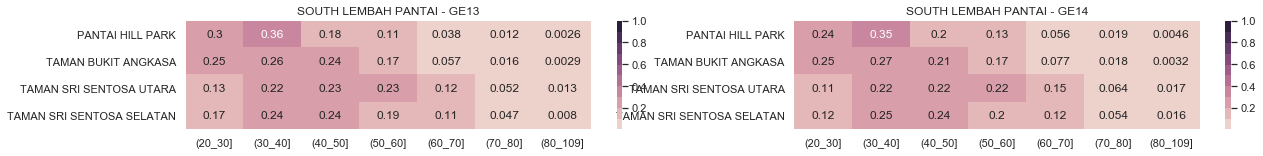

In [71]:
f,ax = plt.subplots(1,2,figsize=(20,2))
sns.heatmap(X13_slp,annot=True, 
            cmap=ListedColormap(cmap),
             vmax=1, ax=ax[0])
ax[0].set_title('SOUTH LEMBAH PANTAI - GE13')

sns.heatmap(X14_slp,annot=True, 
            cmap=ListedColormap(cmap),
             vmax=1, ax=ax[1] )
ax[1].set_title('SOUTH LEMBAH PANTAI - GE14')

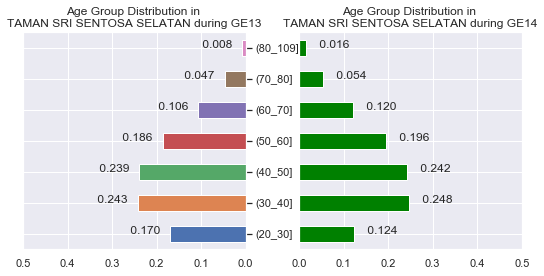

In [72]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(8,4))
toplot.loc['GE13'].plot.barh(ax=axes[0], align='center')
toplot.loc['GE14'].plot.barh(ax=axes[1], align='center', color='Green')
axes[0].set_xlim(0,.5)
axes[1].set_xlim(0,.5)
axes[0].invert_xaxis()

# axes[0].set(yticks=y, yticklabels=states)
axes[0].set(yticklabels=toplot.columns)
axes[0].yaxis.tick_right()

axes[0].set_title('Age Group Distribution in \n%s during GE13' %dm)
axes[1].set_title('Age Group Distribution in \n%s during GE14' %dm )

for ax in axes:
    for patch in ax.patches:
        try:
            if patch.get_height()>0:
                ax.annotate(' %.3f' % patch.get_width(), xy=( patch.get_width()+0.06, patch.get_y() + patch.get_height()/2 ), ha='center',fontsize=12)
        except:
            pass

fig.tight_layout()
fig.subplots_adjust(wspace=0.24)

[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'PANTAI HILL\nPARK'),
 Text(0,0,''),
 Text(0,0,'TAMAN BUKIT\nANGKASA'),
 Text(0,0,''),
 Text(0,0,'TAMAN SRI\nSENTOSA\nSELATAN'),
 Text(0,0,''),
 Text(0,0,'TAMAN SRI\nSENTOSA\nUTARA')]

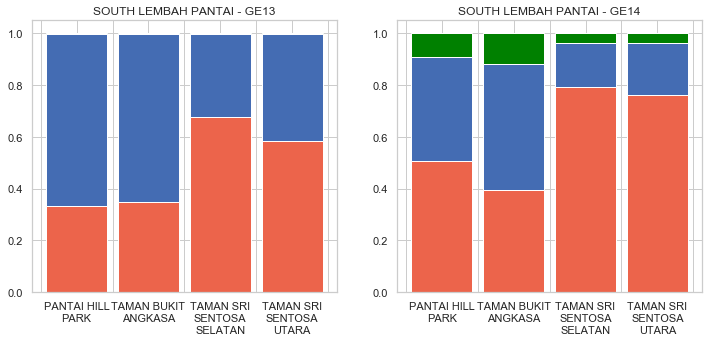

In [73]:
sns.set_style('whitegrid')
f,ax = plt.subplots(1,2, figsize=(12,5))

# Data
tmp13 = pd.DataFrame({'BN':yBN, 'PR':yPR, 'IND':yIND_PAS}).loc[['PANTAI HILL PARK','TAMAN BUKIT ANGKASA','TAMAN SRI SENTOSA SELATAN','TAMAN SRI SENTOSA UTARA']].reset_index().groupby('index').nth(1)
tmp14 = pd.DataFrame({'BN':yBN, 'PR':yPR, 'PAS':yIND_PAS}).loc[['PANTAI HILL PARK','TAMAN BUKIT ANGKASA','TAMAN SRI SENTOSA SELATAN','TAMAN SRI SENTOSA UTARA']].reset_index().groupby('index').nth(0)
r = [0,1,2,3]
raw_data_13 = {'orangeBars': tmp13['PR'].values,'blueBars': tmp13['BN'].values, 'greenBars': tmp13['IND'].values}
raw_data_14 = {'orangeBars': tmp14['PR'].values,'blueBars': tmp14['BN'].values, 'greenBars': tmp14['PAS'].values}
df13 = pd.DataFrame(raw_data_13)
df14 = pd.DataFrame(raw_data_14)
 
# From raw value to percentage
totals13 = [j+k+i for j,k,i in zip( df13['orangeBars'], df13['blueBars'], df13['greenBars'])]
totals14 = [j+k+i for j,k,i in zip( df14['orangeBars'], df14['blueBars'], df14['greenBars'])]

orangeBars13 = [i / j  for i,j in zip(df13['orangeBars'], totals13)]
orangeBars14 = [i / j  for i,j in zip(df14['orangeBars'], totals14)]
blueBars13 = [i / j  for i,j in zip(df13['blueBars'], totals13)]
blueBars14 = [i / j  for i,j in zip(df14['blueBars'], totals14)]
greenBars13 = [i / j  for i,j in zip(df13['greenBars'], totals13)]
greenBars14 = [i / j  for i,j in zip(df14['greenBars'], totals14)]
 
# plot
barWidth = 0.85
names = ('','','PANTAI HILL\nPARK','','TAMAN BUKIT\nANGKASA','','TAMAN SRI\nSENTOSA\nSELATAN','','TAMAN SRI\nSENTOSA\nUTARA')

ax[0].bar(r, greenBars13, bottom=[i+j for i,j in zip(blueBars13,orangeBars13)],  color='green', edgecolor='white', width=barWidth)
ax[0].bar(r, blueBars13, bottom=orangeBars13,  color='#446CB3', edgecolor='white', width=barWidth)
ax[0].bar(r, orangeBars13, color='#EC644B', edgecolor='white', width=barWidth)
ax[0].set_title("SOUTH LEMBAH PANTAI - GE13")

ax[1].bar(r, greenBars14, bottom=[i+j for i,j in zip(blueBars14,orangeBars14)],  color='green', edgecolor='white', width=barWidth)
ax[1].bar(r, blueBars14, bottom=orangeBars14,  color='#446CB3', edgecolor='white', width=barWidth)
ax[1].bar(r, orangeBars14, color='#EC644B', edgecolor='white', width=barWidth)
ax[1].set_title("SOUTH LEMBAH PANTAI - GE14")
 
ax[0].set_xticklabels(names)
ax[1].set_xticklabels(names)
# Custom x axis
# plt.xticks(r, names)
# plt.xlabel("group")

### PPR

In [75]:
X13_ppr = X13.loc[['PANTAI HILL PARK','TAMAN BUKIT ANGKASA','BUKIT BANGSAR','BUKIT KERINCHI','KAMPONG PANTAI HALT','KAMPONG HAJI ABDULLAH HUKOM']]
X14_ppr = X14.loc[['PANTAI HILL PARK','TAMAN BUKIT ANGKASA','BUKIT BANGSAR','BUKIT KERINCHI','KAMPUNG PANTAI HALT','KAMPUNG HAJI ABDULLAH HUKUM']]

Text(0.5,1,'PPR - GE14')

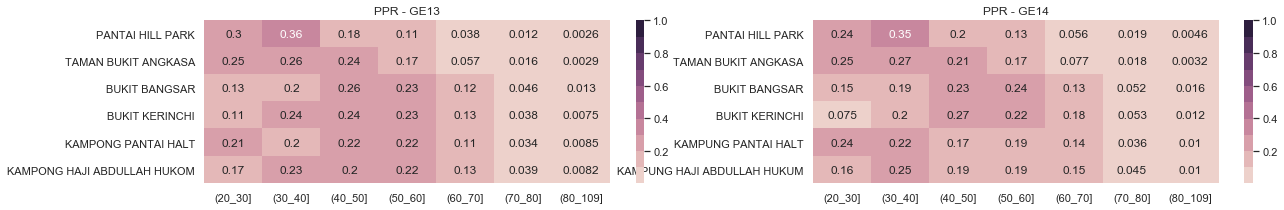

In [76]:
f,ax = plt.subplots(1,2,figsize=(20,3))
sns.heatmap(X13_ppr,annot=True, 
            cmap=ListedColormap(cmap),
             vmax=1, ax=ax[0])
ax[0].set_title('PPR - GE13')

sns.heatmap(X14_ppr,annot=True, 
            cmap=ListedColormap(cmap),
             vmax=1, ax=ax[1] )
ax[1].set_title('PPR - GE14')

In [77]:
dm13 = 'KAMPONG HAJI ABDULLAH HUKOM'
dm14 = 'KAMPUNG HAJI ABDULLAH HUKUM'
toplot = pd.DataFrame([X13_ppr.loc[dm13],X14_ppr.loc[dm14]])
toplot.index = ['GE13','GE14']

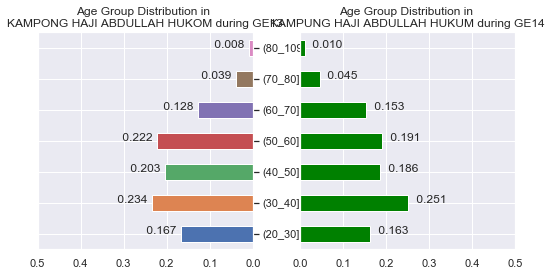

In [78]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(8,4))
toplot.loc['GE13'].plot.barh(ax=axes[0], align='center')
toplot.loc['GE14'].plot.barh(ax=axes[1], align='center', color='Green')
axes[0].set_xlim(0,.5)
axes[1].set_xlim(0,.5)
axes[0].invert_xaxis()

# axes[0].set(yticks=y, yticklabels=states)
axes[0].set(yticklabels=toplot.columns)
axes[0].yaxis.tick_right()

axes[0].set_title('Age Group Distribution in \n%s during GE13' %dm13)
axes[1].set_title('Age Group Distribution in \n%s during GE14' %dm14)

for ax in axes:
    for patch in ax.patches:
        try:
            if patch.get_height()>0:
                ax.annotate(' %.3f' % patch.get_width(), xy=( patch.get_width()+0.05, patch.get_y() + patch.get_height()/2 ), ha='center',fontsize=12)
        except:
            pass

fig.tight_layout()
fig.subplots_adjust(wspace=0.22)

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


[Text(0,0,''),
 Text(0,0,'PANTAI HILL\nPARK'),
 Text(0,0,'TAMAN BUKIT\nANGKASA'),
 Text(0,0,'BUKIT\nBANGSAR'),
 Text(0,0,'BUKIT\nKERINCHI'),
 Text(0,0,'KAMPONG\nPANTAI\nHALT'),
 Text(0,0,'KAMPONG\nHAJI\nABDULLAH\nHUKOM')]

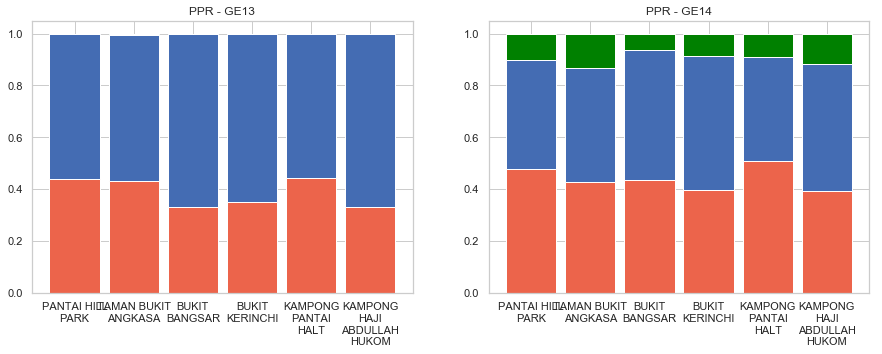

In [79]:
sns.set_style('whitegrid')
f,ax = plt.subplots(1,2, figsize=(15,5))

# Data
tmp13 = pd.DataFrame({'BN':yBN, 'PR':yPR, 'IND':yIND_PAS}).loc[['PANTAI HILL PARK','TAMAN BUKIT ANGKASA','BUKIT BANGSAR','BUKIT KERINCHI','KAMPONG PANTAI HALT','KAMPONG HAJI ABDULLAH HUKOM']].reset_index().groupby('index').nth(1)
tmp13 = tmp13.append(pd.DataFrame({'BN':yBN, 'PR':yPR, 'IND':yIND_PAS}).loc[['KAMPONG PANTAI HALT','KAMPONG HAJI ABDULLAH HUKOM']])
tmp14 = pd.DataFrame({'BN':yBN, 'PR':yPR, 'PAS':yIND_PAS}).loc[['PANTAI HILL PARK','TAMAN BUKIT ANGKASA','BUKIT BANGSAR','BUKIT KERINCHI','KAMPUNG PANTAI HALT','KAMPUNG HAJI ABDULLAH HUKUM']].reset_index().groupby('index').nth(0)
r = [0,1,2,3,4,5]
raw_data_13 = {'orangeBars': tmp13['PR'].values,'blueBars': tmp13['BN'].values,'greenBars': tmp13['IND'].values}
raw_data_14 = {'orangeBars': tmp14['PR'].values,'blueBars': tmp14['BN'].values,'greenBars': tmp14['PAS'].values}
df13 = pd.DataFrame(raw_data_13)
df14 = pd.DataFrame(raw_data_14)
 
# From raw value to percentage
totals13 = [j+k+i for j,k,i in zip( df13['orangeBars'], df13['blueBars'], df13['greenBars'])]
totals14 = [j+k+i for j,k,i in zip( df14['orangeBars'], df14['blueBars'], df14['greenBars'])]

orangeBars13 = [i / j for i,j in zip(df13['orangeBars'], totals13)]
orangeBars14 = [i / j  for i,j in zip(df14['orangeBars'], totals14)]
blueBars13 = [i / j  for i,j in zip(df13['blueBars'], totals13)]
blueBars14 = [i / j  for i,j in zip(df14['blueBars'], totals14)]
greenBars13 = [i / j  for i,j in zip(df13['greenBars'], totals13)]
greenBars14 = [i / j  for i,j in zip(df14['greenBars'], totals14)]
 
# plot
barWidth = 0.85
names = ('','PANTAI HILL\nPARK','TAMAN BUKIT\nANGKASA','BUKIT\nBANGSAR','BUKIT\nKERINCHI','KAMPONG\nPANTAI\nHALT','KAMPONG\nHAJI\nABDULLAH\nHUKOM')

ax[0].bar(r, greenBars13, bottom=[i+j for i,j in zip(blueBars13,orangeBars13)],  color='green', edgecolor='white', width=barWidth)
ax[0].bar(r, blueBars13, bottom=orangeBars13,  color='#446CB3', edgecolor='white', width=barWidth)
ax[0].bar(r, orangeBars13, color='#EC644B', edgecolor='white', width=barWidth)
ax[0].set_title("PPR - GE13")

ax[1].bar(r, greenBars14, bottom=[i+j for i,j in zip(blueBars14,orangeBars14)],  color='green', edgecolor='white', width=barWidth)
ax[1].bar(r, blueBars14, bottom=orangeBars14,  color='#446CB3', edgecolor='white', width=barWidth)
ax[1].bar(r, orangeBars14, color='#EC644B', edgecolor='white', width=barWidth)
ax[1].set_title("PPR - GE14")
 
ax[0].set_xticklabels(names)
ax[1].set_xticklabels(names)

# Custom x axis
# plt.xticks(r, names)
# plt.xlabel("group")

In [81]:
yBN13.loc[['PANTAI HILL PARK','TAMAN BUKIT ANGKASA','TAMAN SRI SENTOSA UTARA','TAMAN SRI SENTOSA SELATAN']]
yBN14.loc[['PANTAI HILL PARK','TAMAN BUKIT ANGKASA','TAMAN SRI SENTOSA UTARA','TAMAN SRI SENTOSA SELATAN']]

NAMA DM
PANTAI HILL PARK             0.330840
TAMAN BUKIT ANGKASA          0.399816
TAMAN SRI SENTOSA UTARA      0.170792
TAMAN SRI SENTOSA SELATAN    0.144686
Name: BN_ratio, dtype: float64

In [83]:
tmp = pd.DataFrame([X13['(20_30]'], yBN13]).T.dropna()

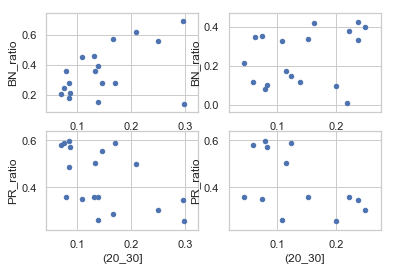

In [84]:
f,ax = plt.subplots(2,2)
pd.DataFrame([X13['(20_30]'], yBN13]).T.dropna().plot.scatter(x='(20_30]', y='BN_ratio', ax=ax[0][0])
pd.DataFrame([X14['(20_30]'], yBN14]).T.dropna().plot.scatter(x='(20_30]', y='BN_ratio', ax=ax[0][1])
pd.DataFrame([X13['(20_30]'], yPR13]).T.dropna().plot.scatter(x='(20_30]', y='PR_ratio', ax=ax[1][0])
pd.DataFrame([X14['(20_30]'], yPR13]).T.dropna().plot.scatter(x='(20_30]', y='PR_ratio', ax=ax[1][1])